In [454]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os




In [243]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
window_width = 100
batch_num = [8,32,72,100]


for batch_size in batch_num:
#for window_input_width in window_width:
    
#     SEED = 1
#     random.seed(SEED)
#     np.random.seed(SEED)
#     tf.random.set_seed(SEED)
    
    linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns  = d2d.import_data(filename = file)

    da = df_all_chan.to_numpy()

    window_input_width = window_input_width

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                    input_width=window_width,
                                                    label_width=1, 
                                                    shift=0,
                                                    label_columns=['Discharge'],
                                                    input_columns=input_columns,
                                                    shuffle=True,
                                                    batch_size=batch_size)
    
    
    import matplotlib
    import matplotlib.pyplot as plt
    
    
    
    history['lstm_'+str(window_width)+'_'+filt+str(batch_size)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

    val_performance['lstm_'+str(window_width)+'_'+filt+str(batch_size)] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_'+str(window_width)+'_'+filt+str(batch_size)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/100
55/55 [==============================] - 3s 37ms/step - loss: 0.8073 - mean_absolute_error: 0.6972 - val_loss: 0.5556 - val_mean_absolute_error: 0.5517
Epoch 2/100
55/55 [==============================] - 2s 33ms/step - loss: 0.4157 - mean_absolute_error: 0.5058 - val_loss: 0.4167 - val_mean_absolute_error: 0.4796
Epoch 3/100
55/55 [==============================] - 2s 33ms/step - loss: 0.2930 - mean_absolute_error: 0.4134 - val_loss: 0.3411 - val_mean_absolute_error: 0.4443
Epoch 4/100
55/55 [==============================] - 2s 33ms/step - loss: 0.2162 - mean_absolute_error: 0.3548 - val_loss: 0.3507 - val_mean_absolute_error: 0.4399
Epoch 5/100
55/55 [==============================] - 2s 33ms/step - loss: 0.1631 - mean_absolute_error: 0.3046 - val_loss: 0.3116 - val_mean_absolute_error: 0.4056
Epoch 6/100
55/55 [==============================] - 2s 33ms/step - loss: 0.1396 - mean_absolute_error: 0.2912 - val_loss: 0

6/6 [==============================] - 1s 117ms/step - loss: 9.3892e-04 - mean_absolute_error: 0.0183 - val_loss: 0.1188 - val_mean_absolute_error: 0.1502
Epoch 40/100
1/1 [==============================] - 0s 112ms/step - loss: 0.1190 - mean_absolute_error: 0.1483
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/100
4/4 [==============================] - 2s 242ms/step - loss: 1.4147 - mean_absolute_error: 0.9645 - val_loss: 0.8228 - val_mean_absolute_error: 0.7336
Epoch 2/100
4/4 [==============================] - 1s 173ms/step - loss: 0.6843 - mean_absolute_error: 0.6874 - val_loss: 0.4538 - val_mean_absolute_error: 0.5178
Epoch 3/100
4/4 [==============================] - 1s 174ms/step - loss: 0.3845 - mean_absolute_error: 0.4822 - val_loss: 0.4089 - val_mean_absolute_error: 0.5003
Epoch 4/100
4/4 [==============================] - 1s 177ms/step - loss: 0.3148 - mean_absolute_error: 0.4386 - val_loss: 0.3119 - val_mean_absolute_error: 0.4198
Epoch 5/100
4/4 [=========

In [244]:
print(history)

{'lstm_100_Highpass8': <tensorflow.python.keras.callbacks.History object at 0x7fae7db9db50>, 'lstm_100_Highpass32': <tensorflow.python.keras.callbacks.History object at 0x7fae5ff18970>, 'lstm_100_Highpass72': <tensorflow.python.keras.callbacks.History object at 0x7fae61ada430>, 'lstm_100_Highpass100': <tensorflow.python.keras.callbacks.History object at 0x7fae6d45f100>}


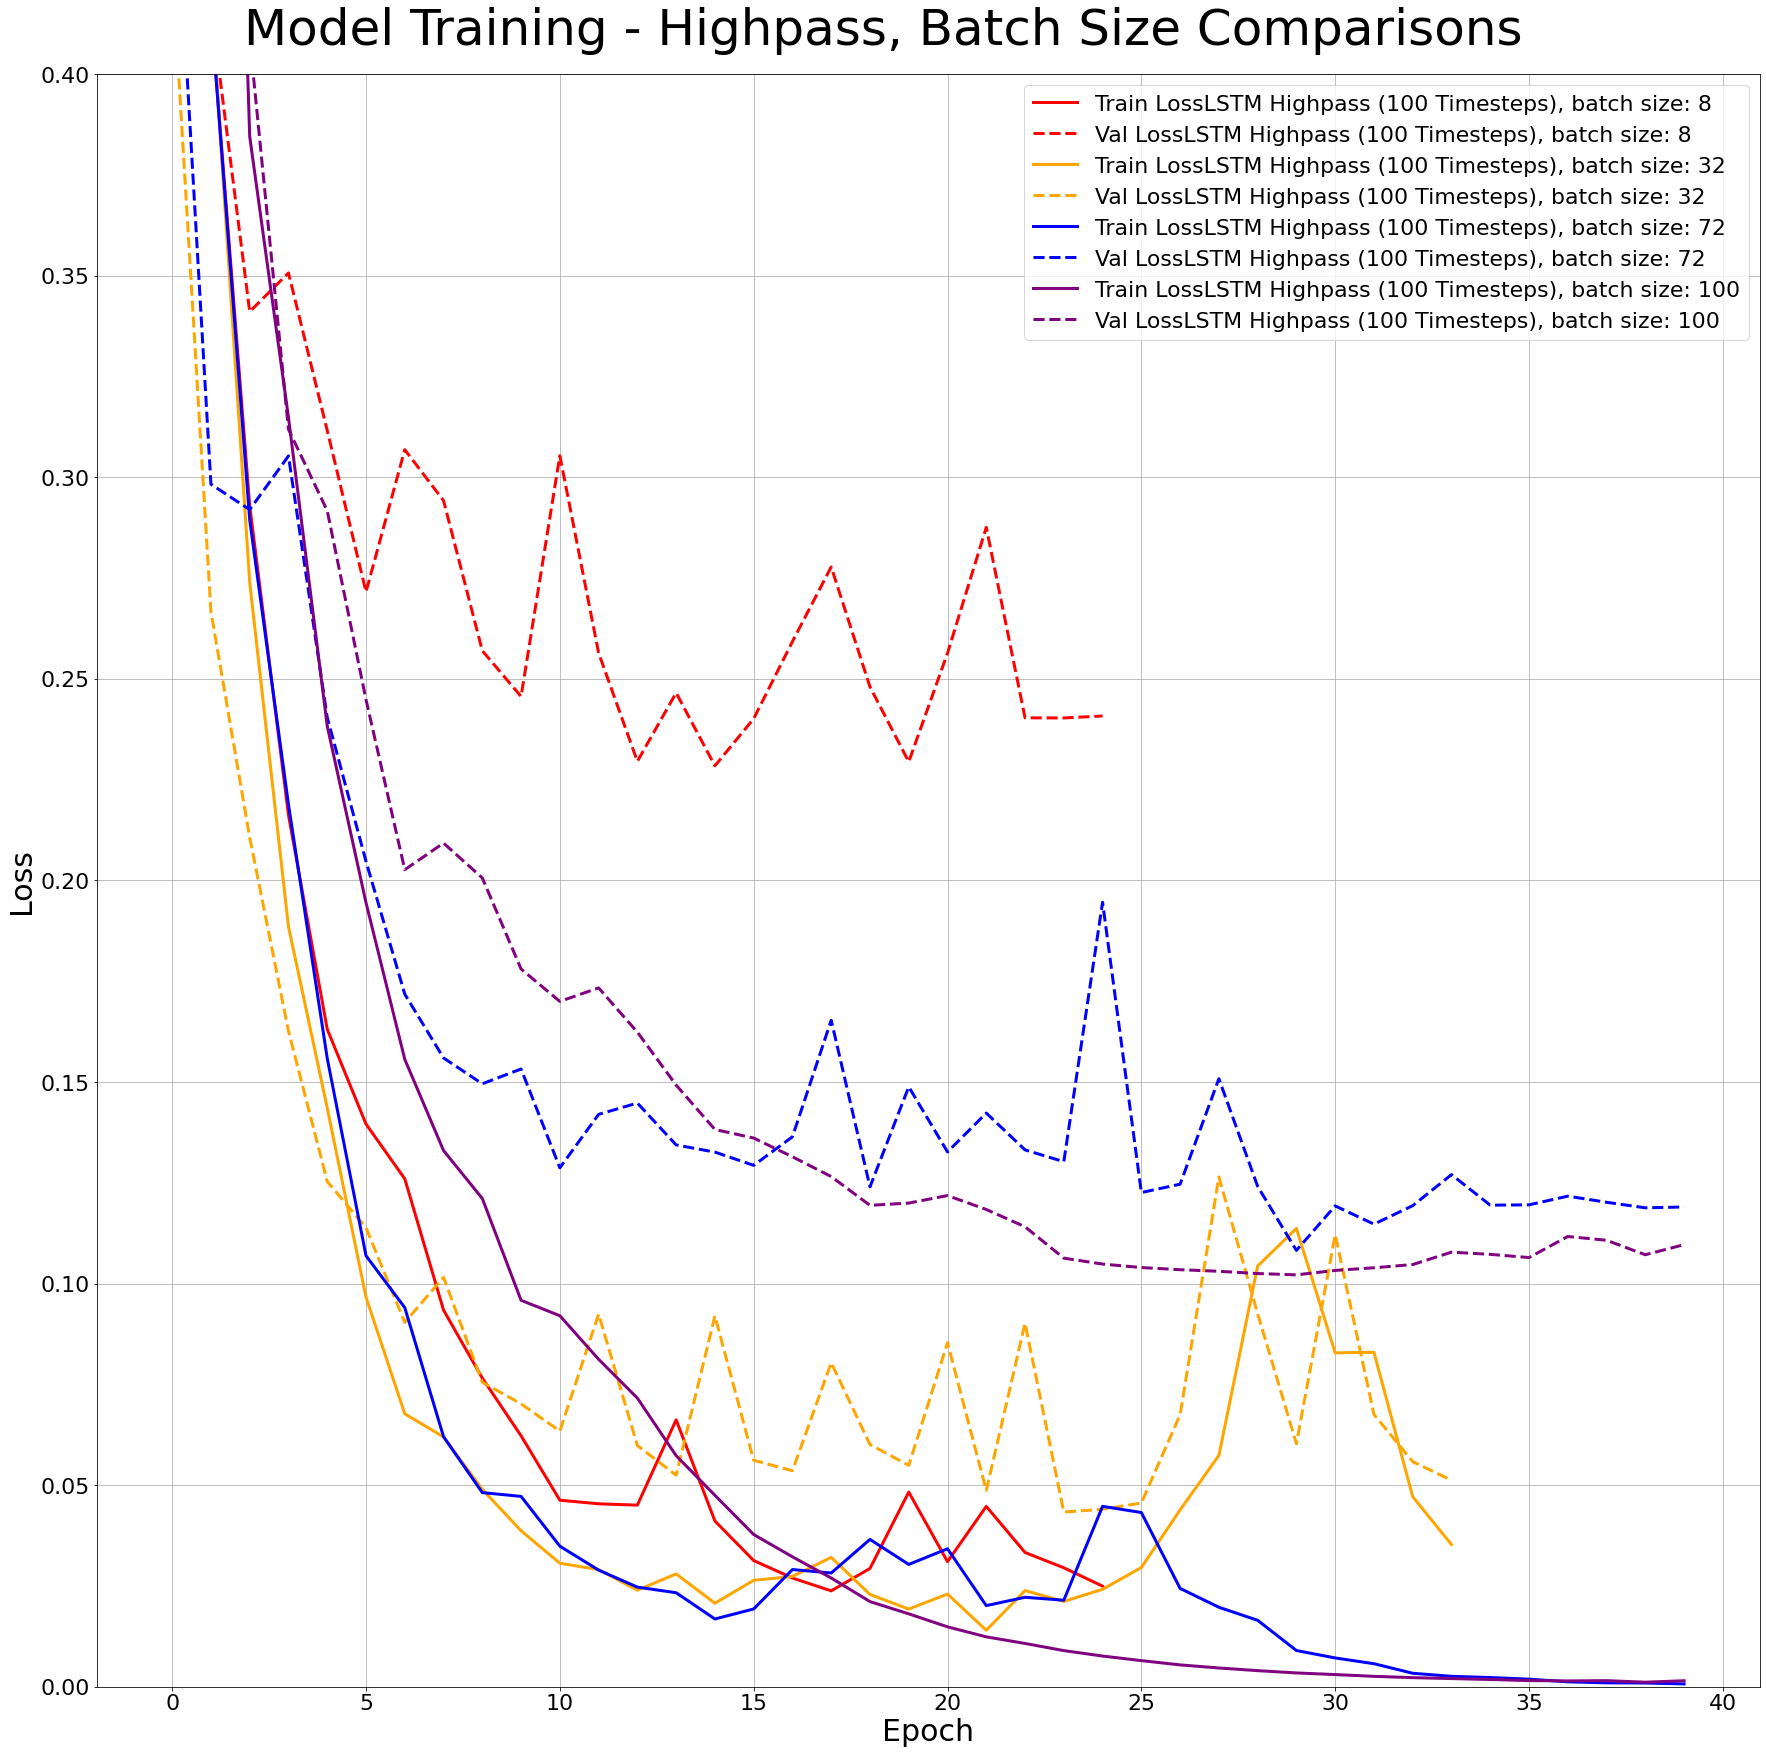

In [245]:
colors =['red', 'orange', 'blue', 'purple']
fig, ax = plt.subplots(figsize=(25,25))
for hist, legend, c in zip(('lstm_'+str(window_width)+'_Highpass'+str(batch_num[0]),'lstm_'+str(window_width)+'_Highpass'+str(batch_num[1]),'lstm_'+str(window_width)+'_Highpass'+str(batch_num[2]), 'lstm_'+str(window_width)+'_Highpass'+str(batch_num[3])),
                            ('LSTM Highpass ('+str(window_width)+' Timesteps), batch size: '+str(batch_num[0]),'LSTM Highpass ('+str(window_width)+' Timesteps), batch size: '+str(batch_num[1]),'LSTM Highpass ('+str(window_width)+' Timesteps), batch size: '+str(batch_num[2]),'LSTM Highpass ('+str(window_width)+' Timesteps), batch size: '+str(batch_num[3])),
                          colors):
    
    ax.plot(history[hist].history['loss'], label='Train Loss'+legend,linewidth=3, c=c)
    ax.plot(history[hist].history['val_loss'], label='Val Loss'+legend,linewidth=3, ls='--', c=c)
    
fig.patch.set_facecolor('white')
ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)
ax.set_ylim((0, .4))
ax.grid()
ax.legend()
fig.suptitle('Model Training - Highpass, Batch Size Comparisons', fontsize = 50)

plt.tight_layout()
plt.show()

In [197]:
#plt.imshow(multi_step_window_shuffled.train_channels_normed[1][0],aspect='auto', vmin = -2, vmax=2)

In [198]:
#plt.imshow(multi_step_window_shuffled.train_channels_normed[1][1],aspect='auto', vmin = -5, vmax=5)

In [142]:
#plt.imshow(multi_step_window_shuffled.train_channels_normed[0][16])

In [328]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
window_width = [1000,1500,2000,2500]
batch_size = [2,2,2,2]


for ww, bs in zip(window_width,batch_size):
#for window_input_width in window_width:
    
    SEED = 1
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    
    linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns  = d2d.import_data(filename = file)

    da = df_all_chan.to_numpy()

    window_input_width = window_input_width

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                    input_width=ww,
                                                    label_width=1, 
                                                    shift=0,
                                                    label_columns=['Discharge'],
                                                    input_columns=input_columns,
                                                    shuffle=True,
                                                    batch_size=bs)
    
    
    
    history['lstm_'+str(ww)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

    val_performance['lstm_'+str(ww)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_'+str(ww)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/100
21/21 [==============================] - 5s 220ms/step - loss: 1.0606 - mean_absolute_error: 0.8525 - val_loss: 0.6266 - val_mean_absolute_error: 0.6255
Epoch 2/100
21/21 [==============================] - 4s 209ms/step - loss: 0.5366 - mean_absolute_error: 0.5539 - val_loss: 0.6452 - val_mean_absolute_error: 0.6523
Epoch 3/100
21/21 [==============================] - 4s 208ms/step - loss: 0.3319 - mean_absolute_error: 0.4404 - val_loss: 0.3359 - val_mean_absolute_error: 0.5054
Epoch 4/100
21/21 [==============================] - 4s 209ms/step - loss: 0.2104 - mean_absolute_error: 0.3349 - val_loss: 0.2935 - val_mean_absolute_error: 0.4553
Epoch 5/100
21/21 [==============================] - 4s 209ms/step - loss: 0.2099 - mean_absolute_error: 0.3261 - val_loss: 0.3424 - val_mean_absolute_error: 0.4747
Epoch 6/100
21/21 [==============================] - 4s 211ms/step - loss: 0.2113 - mean_absolute_error: 0.2930 - val_l

In [329]:
print(history)

{'lstm_1000_Highpass': <tensorflow.python.keras.callbacks.History object at 0x7fae6e66e3a0>, 'lstm_1500_Highpass': <tensorflow.python.keras.callbacks.History object at 0x7fae7d732700>, 'lstm_2000_Highpass': <tensorflow.python.keras.callbacks.History object at 0x7fae6c688910>, 'lstm_2500_Highpass': <tensorflow.python.keras.callbacks.History object at 0x7fae5ec5e8e0>}


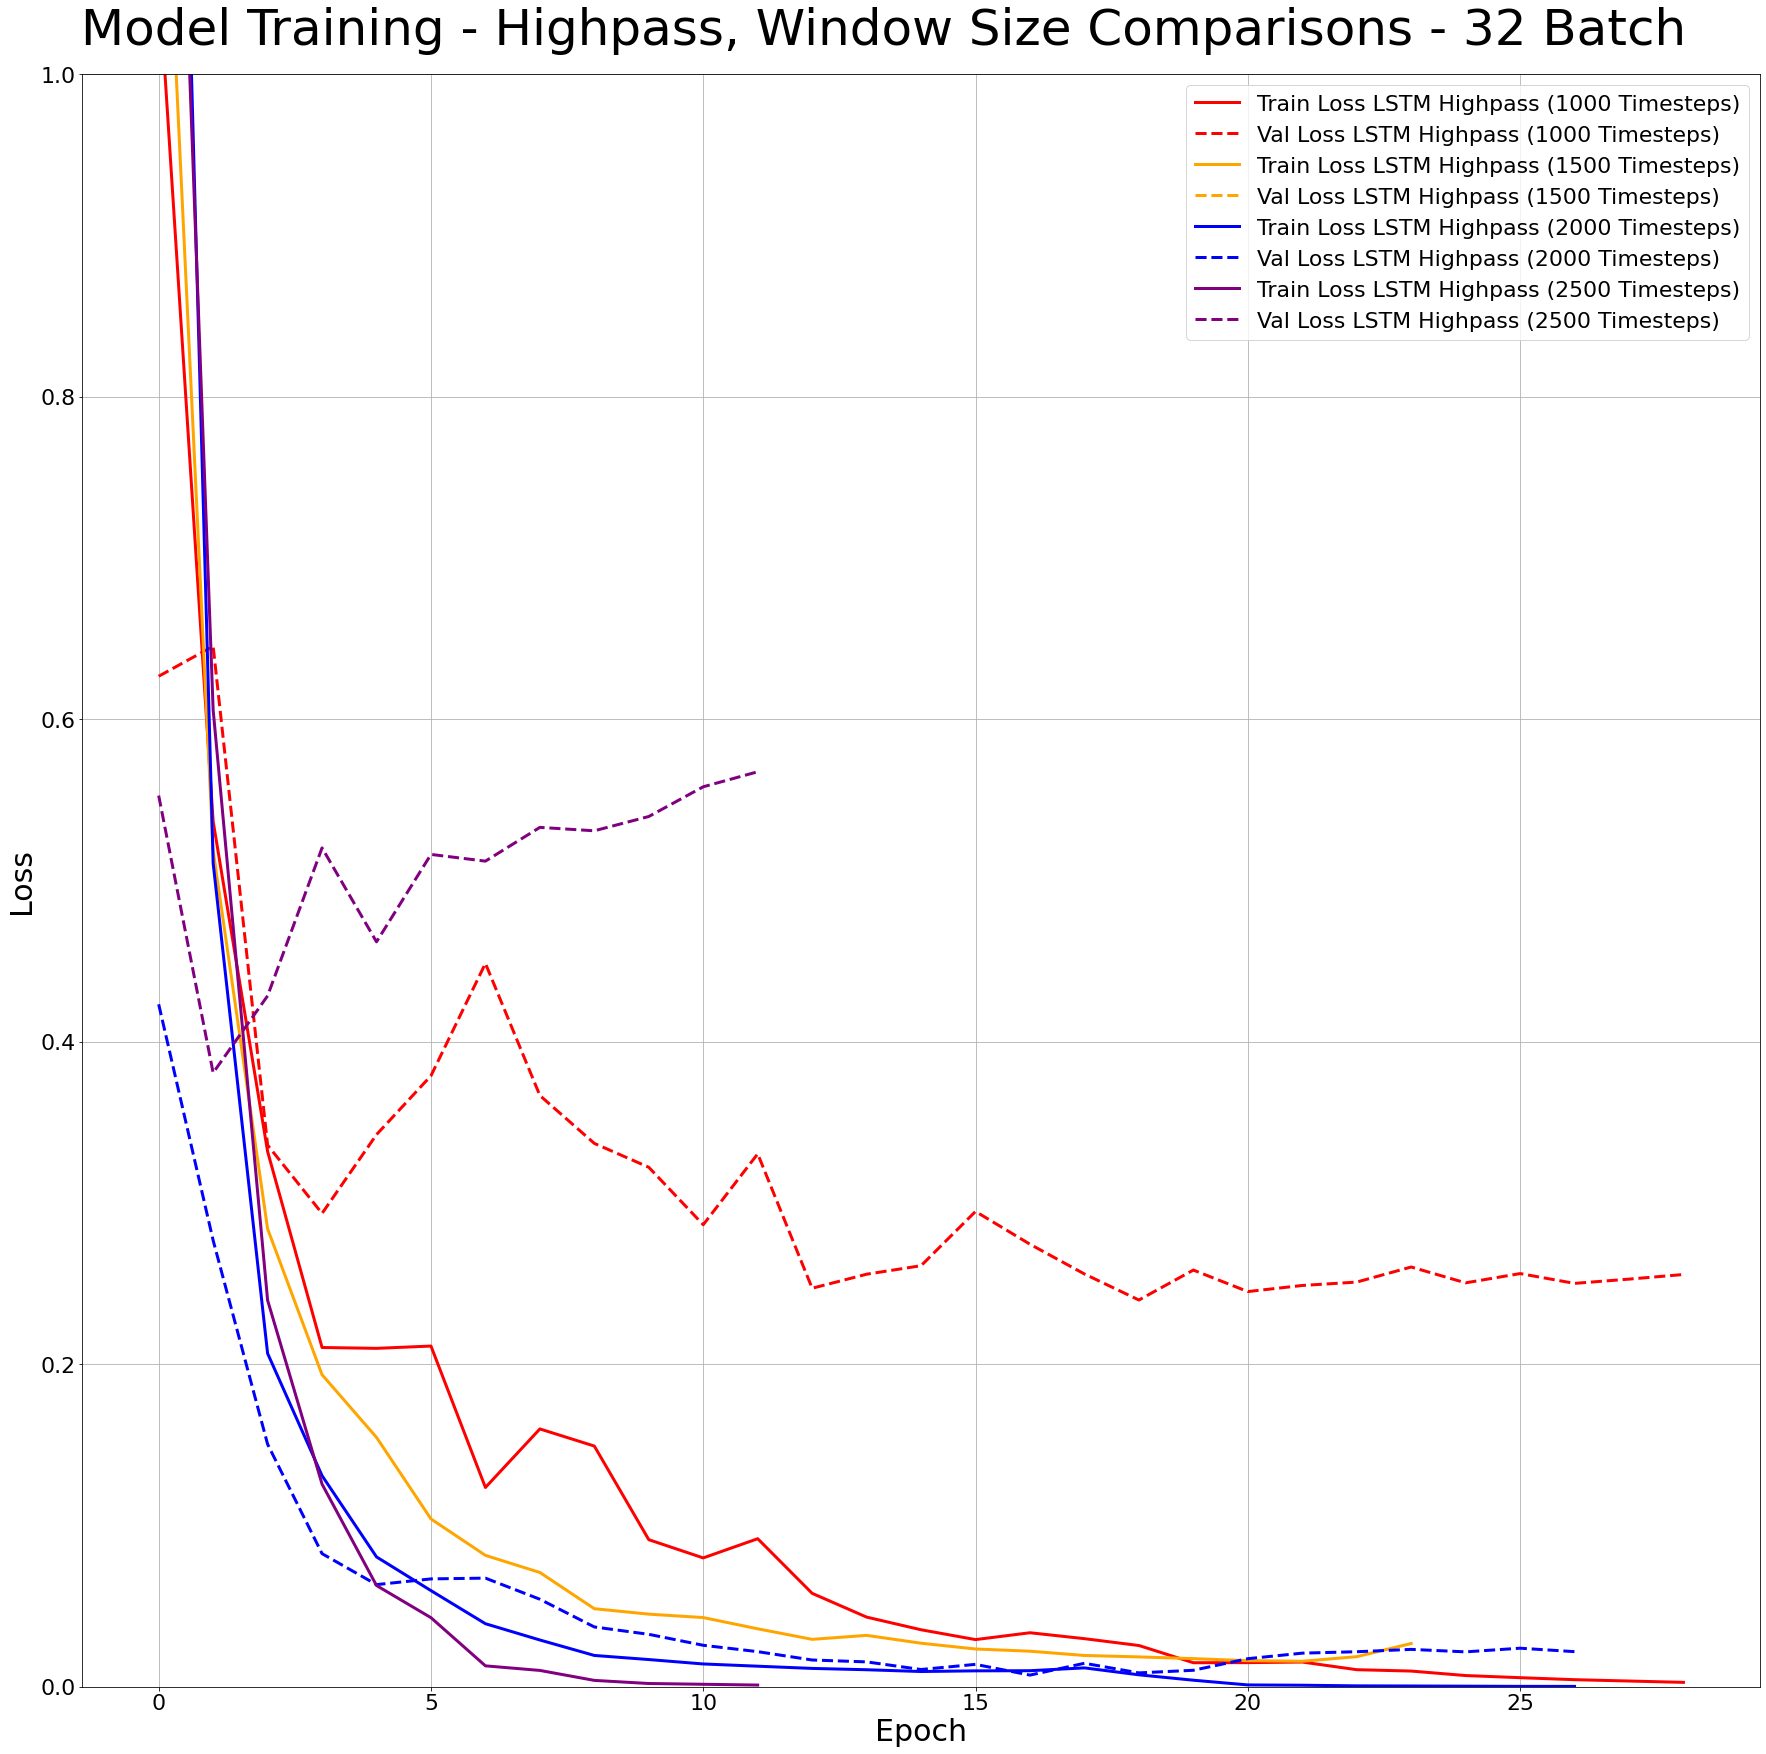

In [330]:
    
import matplotlib
import matplotlib.pyplot as plt

colors =['red', 'orange', 'blue', 'purple']
fig, ax = plt.subplots(figsize=(25,25))

for hist, legend, c in zip(('lstm_'+str(window_width[0])+'_Highpass','lstm_'+str(window_width[1])+'_Highpass','lstm_'+str(window_width[2])+'_Highpass', 'lstm_'+str(window_width[3])+'_Highpass'),
                            ('LSTM Highpass ('+str(window_width[0])+' Timesteps)','LSTM Highpass ('+str(window_width[1])+' Timesteps)','LSTM Highpass ('+str(window_width[2])+' Timesteps)','LSTM Highpass ('+str(window_width[3])+' Timesteps)'),
                          colors):
        ax.plot(history[hist].history['loss'], label='Train Loss '+legend,linewidth=3, c=c)
        ax.plot(history[hist].history['val_loss'], label='Val Loss '+legend,linewidth=3, ls='--', c=c)
    
fig.patch.set_facecolor('white')
ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)
ax.set_ylim((0, 1))
ax.grid()
ax.legend()
fig.suptitle('Model Training - Highpass, Window Size Comparisons - 32 Batch', fontsize = 50)

plt.tight_layout()
plt.show()

# Test run of the best parameterization I could find

#### batch size = 2
#### window width = 2000

In [455]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
ww = 10000
bs = 1

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)



linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns  = d2d.import_data(filename = file)

da = df_all_chan.to_numpy()

window_input_width = window_input_width

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=ww,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=input_columns,
                                                shuffle=True,
                                                batch_size=bs)

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


In [354]:
history['lstm_'+str(ww)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

val_performance['lstm_'+str(ww)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.val)
performance['lstm_'+str(ww)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

Epoch 1/100
11/11 [==============================] - 6s 454ms/step - loss: 1.7407 - mean_absolute_error: 1.0260 - val_loss: 0.4232 - val_mean_absolute_error: 0.5152
Epoch 2/100
11/11 [==============================] - 5s 429ms/step - loss: 0.5108 - mean_absolute_error: 0.5668 - val_loss: 0.2768 - val_mean_absolute_error: 0.4326
Epoch 3/100
11/11 [==============================] - 5s 425ms/step - loss: 0.2067 - mean_absolute_error: 0.3400 - val_loss: 0.1504 - val_mean_absolute_error: 0.3392
Epoch 4/100
11/11 [==============================] - 5s 420ms/step - loss: 0.1309 - mean_absolute_error: 0.2570 - val_loss: 0.0826 - val_mean_absolute_error: 0.2185
Epoch 5/100
11/11 [==============================] - 5s 432ms/step - loss: 0.0805 - mean_absolute_error: 0.1743 - val_loss: 0.0634 - val_mean_absolute_error: 0.1853
Epoch 6/100
11/11 [==============================] - 5s 433ms/step - loss: 0.0596 - mean_absolute_error: 0.1289 - val_loss: 0.0669 - val_mean_absolute_error: 0.1828
Epoch 7/10

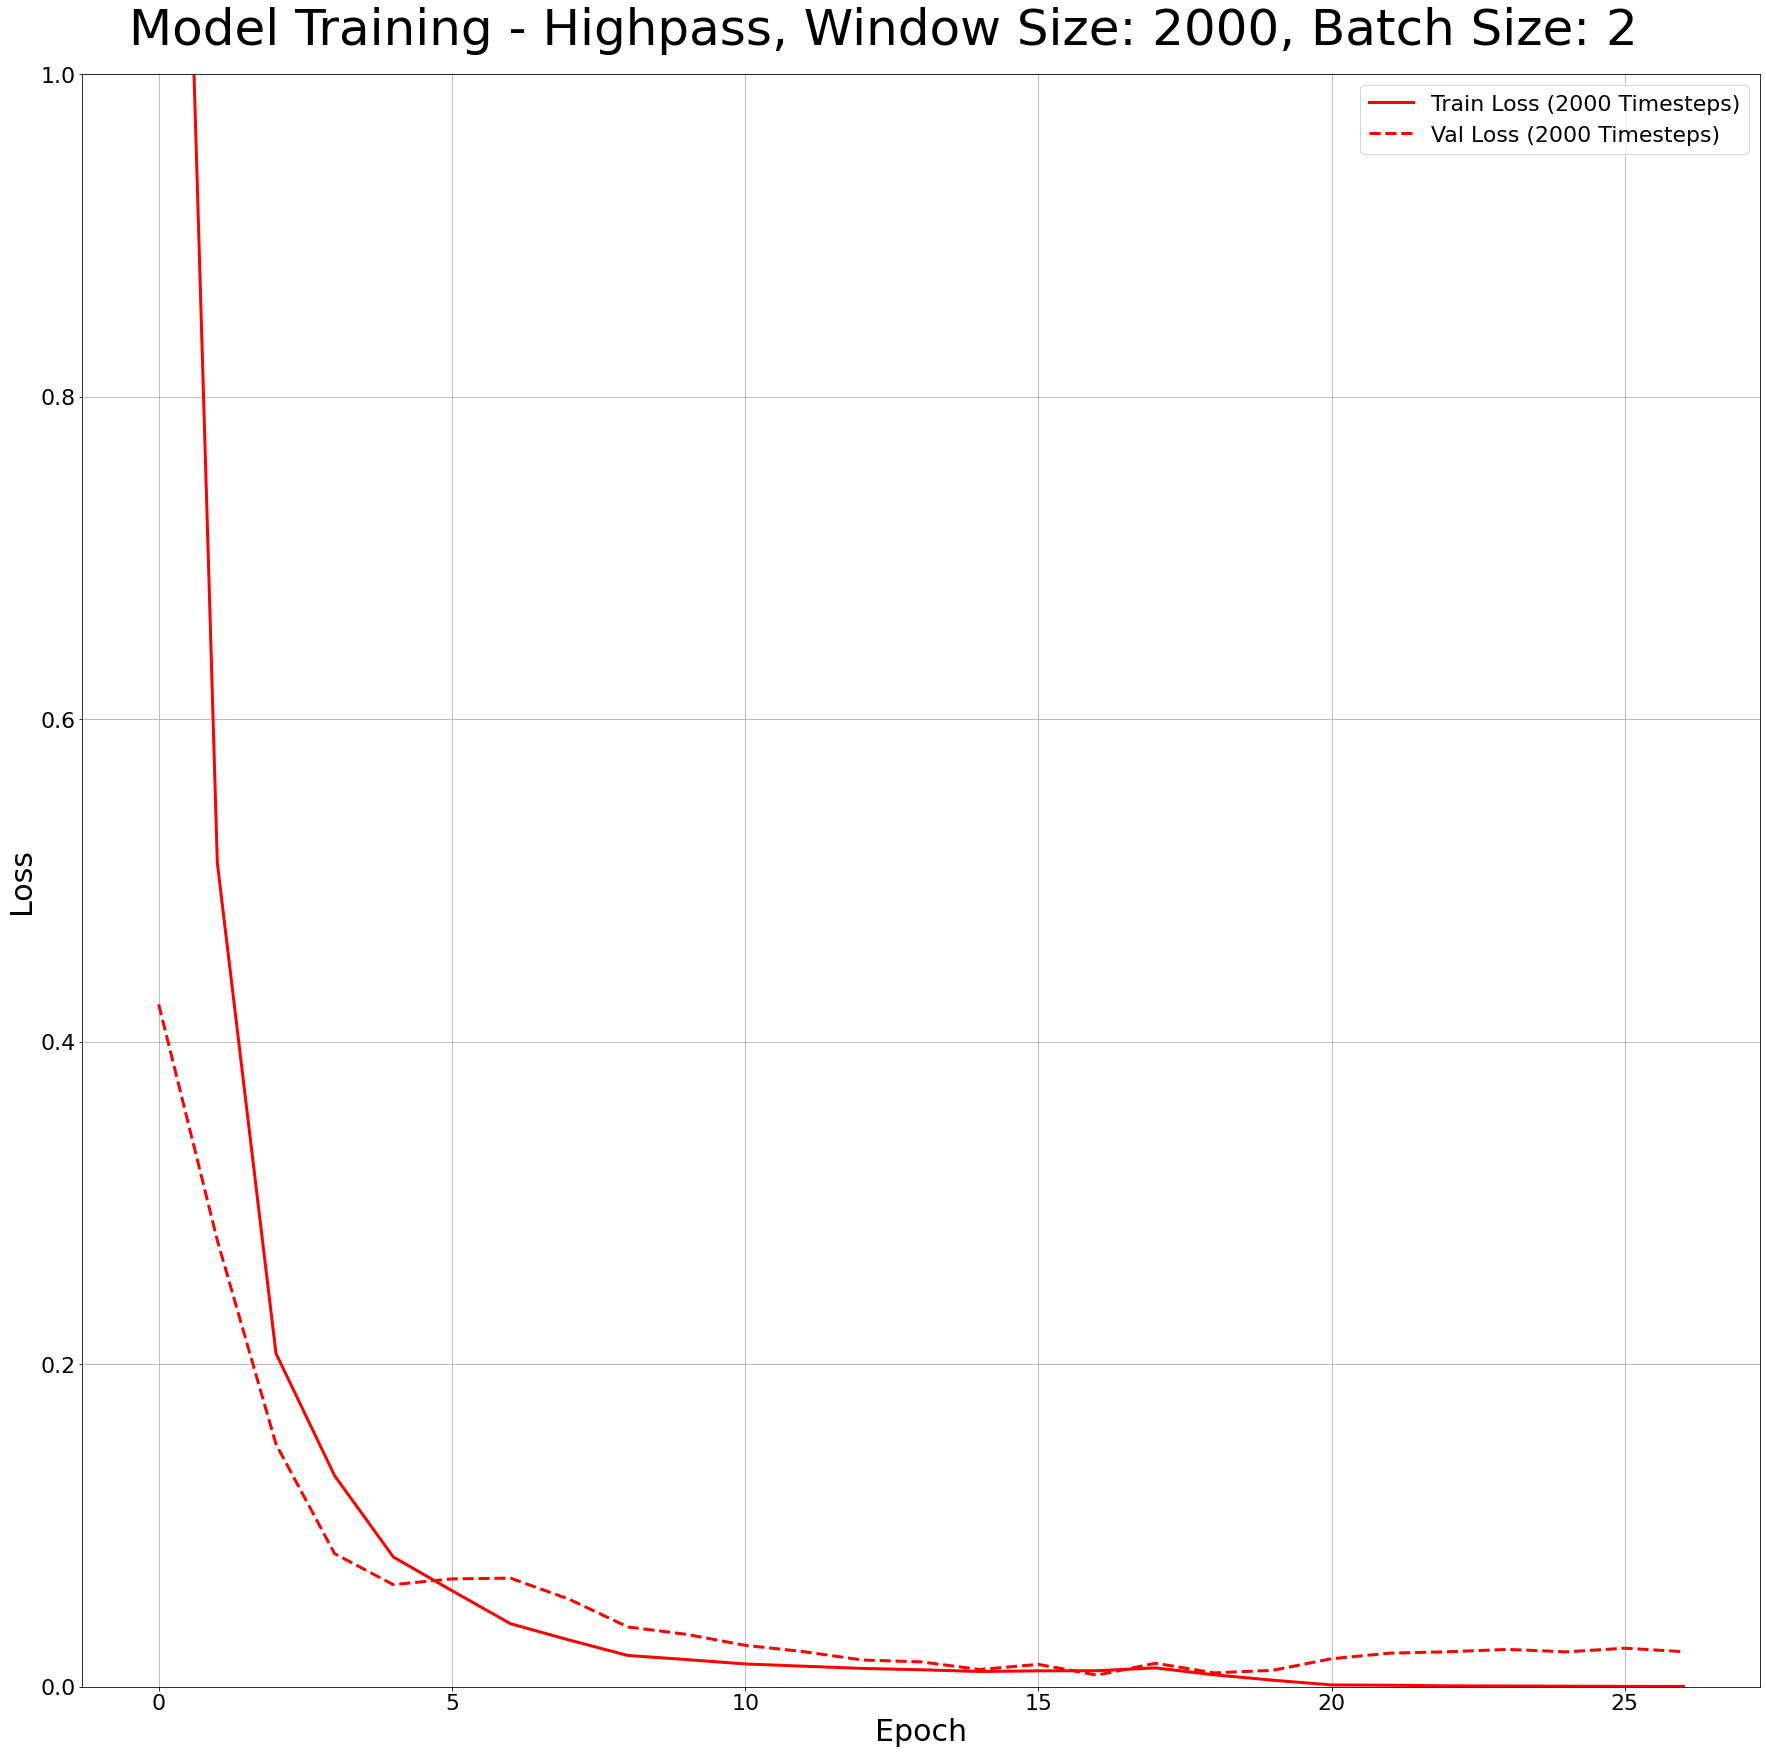

In [358]:
fig, ax = plt.subplots(figsize=(25,25))

ax.plot(history['lstm_'+str(ww)+'_'+filt].history['loss'], label='Train Loss ('+str(ww)+' Timesteps)',linewidth=3, c='red')
ax.plot(history['lstm_'+str(ww)+'_'+filt].history['val_loss'], label='Val Loss ('+str(ww)+' Timesteps)',linewidth=3, ls='--', c='red')

fig.patch.set_facecolor('white')
ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)
ax.set_ylim((0, 1))
ax.grid()
ax.legend()
fig.suptitle('Model Training - Highpass, Window Size: 2000, Batch Size: 2', fontsize = 50)

plt.tight_layout()
plt.show()

In [356]:
pred_on_val = lstm_model.predict(multi_step_window_shuffled.val)
pred_on_val

array([[-1.2401795 ],
       [-0.07293117],
       [ 0.48449275],
       [ 0.7938757 ],
       [ 1.4460201 ],
       [ 2.094106  ]], dtype=float32)

In [345]:
true_dis_val = []

for i in multi_step_window_shuffled.val.as_numpy_iterator():
    true_dis_val.append(i[1])

true_dis_val = np.asarray(true_dis_val)
true_dis_val = true_dis_val.squeeze()

In [349]:
true_dis_val= true_dis_val.reshape(6,1)

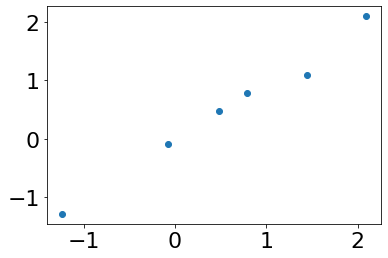

In [351]:
plt.scatter(pred_on_val,true_dis_val)

In [359]:
units=32 #found in the layer compile and model creation e.g. .LSTM(units)
weights = lstm_model.layers[0].get_weights()[0]

input_gate = weights[:, :units]
forget_gate = weights[:, units: units * 2]
cell_state = weights[:, units * 2: units * 3]
output = weights[:, units * 3:]

print(weights.shape)
weights

(2308, 128)


array([[-0.02818834,  0.04790572,  0.00792358, ..., -0.03369916,
        -0.00996199, -0.0060633 ],
       [ 0.04408215, -0.01312331,  0.0179351 , ..., -0.01180581,
         0.02743429, -0.02995169],
       [-0.01359571,  0.03820837,  0.03672937, ..., -0.03661177,
         0.05617138, -0.03429089],
       ...,
       [-0.04083331, -0.00583453,  0.02159736, ..., -0.02396964,
        -0.02719978, -0.04665902],
       [-0.02732568,  0.01457612, -0.00759291, ..., -0.00492188,
        -0.0409632 , -0.00064278],
       [-0.006798  ,  0.03701295,  0.03400231, ...,  0.03262995,
         0.02356911, -0.02313855]], dtype=float32)

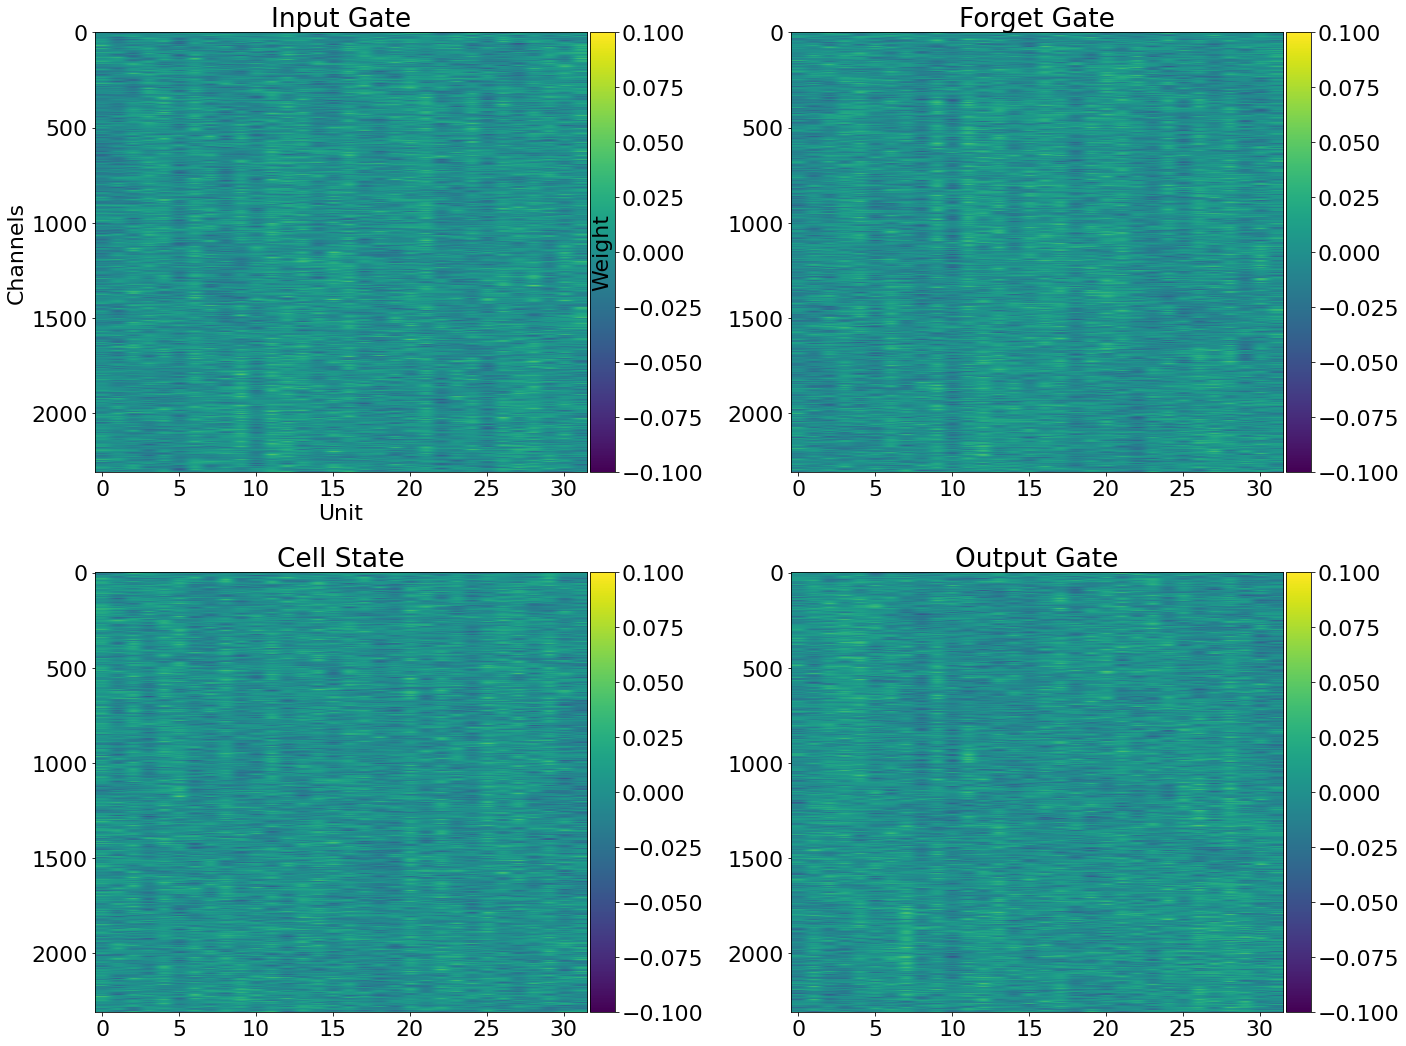

In [362]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(20,15))
fig.patch.set_facecolor('white')

ax0 = fig.add_subplot(221)
im0 = ax0.imshow(input_gate, aspect = 'auto', vmin=-.1, vmax=.1)
ax0.set_ylabel('Channels')
ax0.set_xlabel('Unit')
ax0.set_title('Input Gate')

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
clb = fig.colorbar(im0, cax=cax, orientation='vertical', )
clb.ax.set_ylabel('Weight', labelpad=-111)

ax1 = fig.add_subplot(222)
im1 = ax1.imshow(forget_gate, aspect = 'auto', vmin=-.1, vmax=.1)
ax1.set_title('Forget Gate')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(223)
im2 = ax2.imshow(cell_state, aspect = 'auto', vmin=-.1, vmax=.1)
ax2.set_title('Cell State')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(224)
im3 = ax3.imshow(output, aspect = 'auto', vmin=-.1, vmax=.1)
ax3.set_title('Output Gate')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

# Returning sequences works well enough to drop the window down

In [29]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

In [30]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
ww = 400
bs = 16

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)



linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns  = d2d.import_data(filename = file)

da = df_all_chan.to_numpy()

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=ww,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=input_columns,
                                                shuffle=True,
                                                batch_size=bs)

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


In [31]:
history['lstm_'+str(ww)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

val_performance['lstm_'+str(ww)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.val)
performance['lstm_'+str(ww)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

Epoch 1/1000
7/7 [==============================] - 2s 220ms/step - loss: 0.8370 - mean_absolute_error: 0.7405 - val_loss: 0.5317 - val_mean_absolute_error: 0.5870
Epoch 2/1000
7/7 [==============================] - 1s 178ms/step - loss: 0.3865 - mean_absolute_error: 0.4960 - val_loss: 0.4376 - val_mean_absolute_error: 0.5388
Epoch 3/1000
7/7 [==============================] - 1s 187ms/step - loss: 0.3025 - mean_absolute_error: 0.4323 - val_loss: 0.3745 - val_mean_absolute_error: 0.4898
Epoch 4/1000
7/7 [==============================] - 1s 183ms/step - loss: 0.2811 - mean_absolute_error: 0.4114 - val_loss: 0.3788 - val_mean_absolute_error: 0.4830
Epoch 5/1000
7/7 [==============================] - 1s 175ms/step - loss: 0.2605 - mean_absolute_error: 0.3998 - val_loss: 0.3818 - val_mean_absolute_error: 0.4778
Epoch 6/1000
7/7 [==============================] - 1s 175ms/step - loss: 0.2566 - mean_absolute_error: 0.3899 - val_loss: 0.3970 - val_mean_absolute_error: 0.4825
Epoch 7/1000
7/7

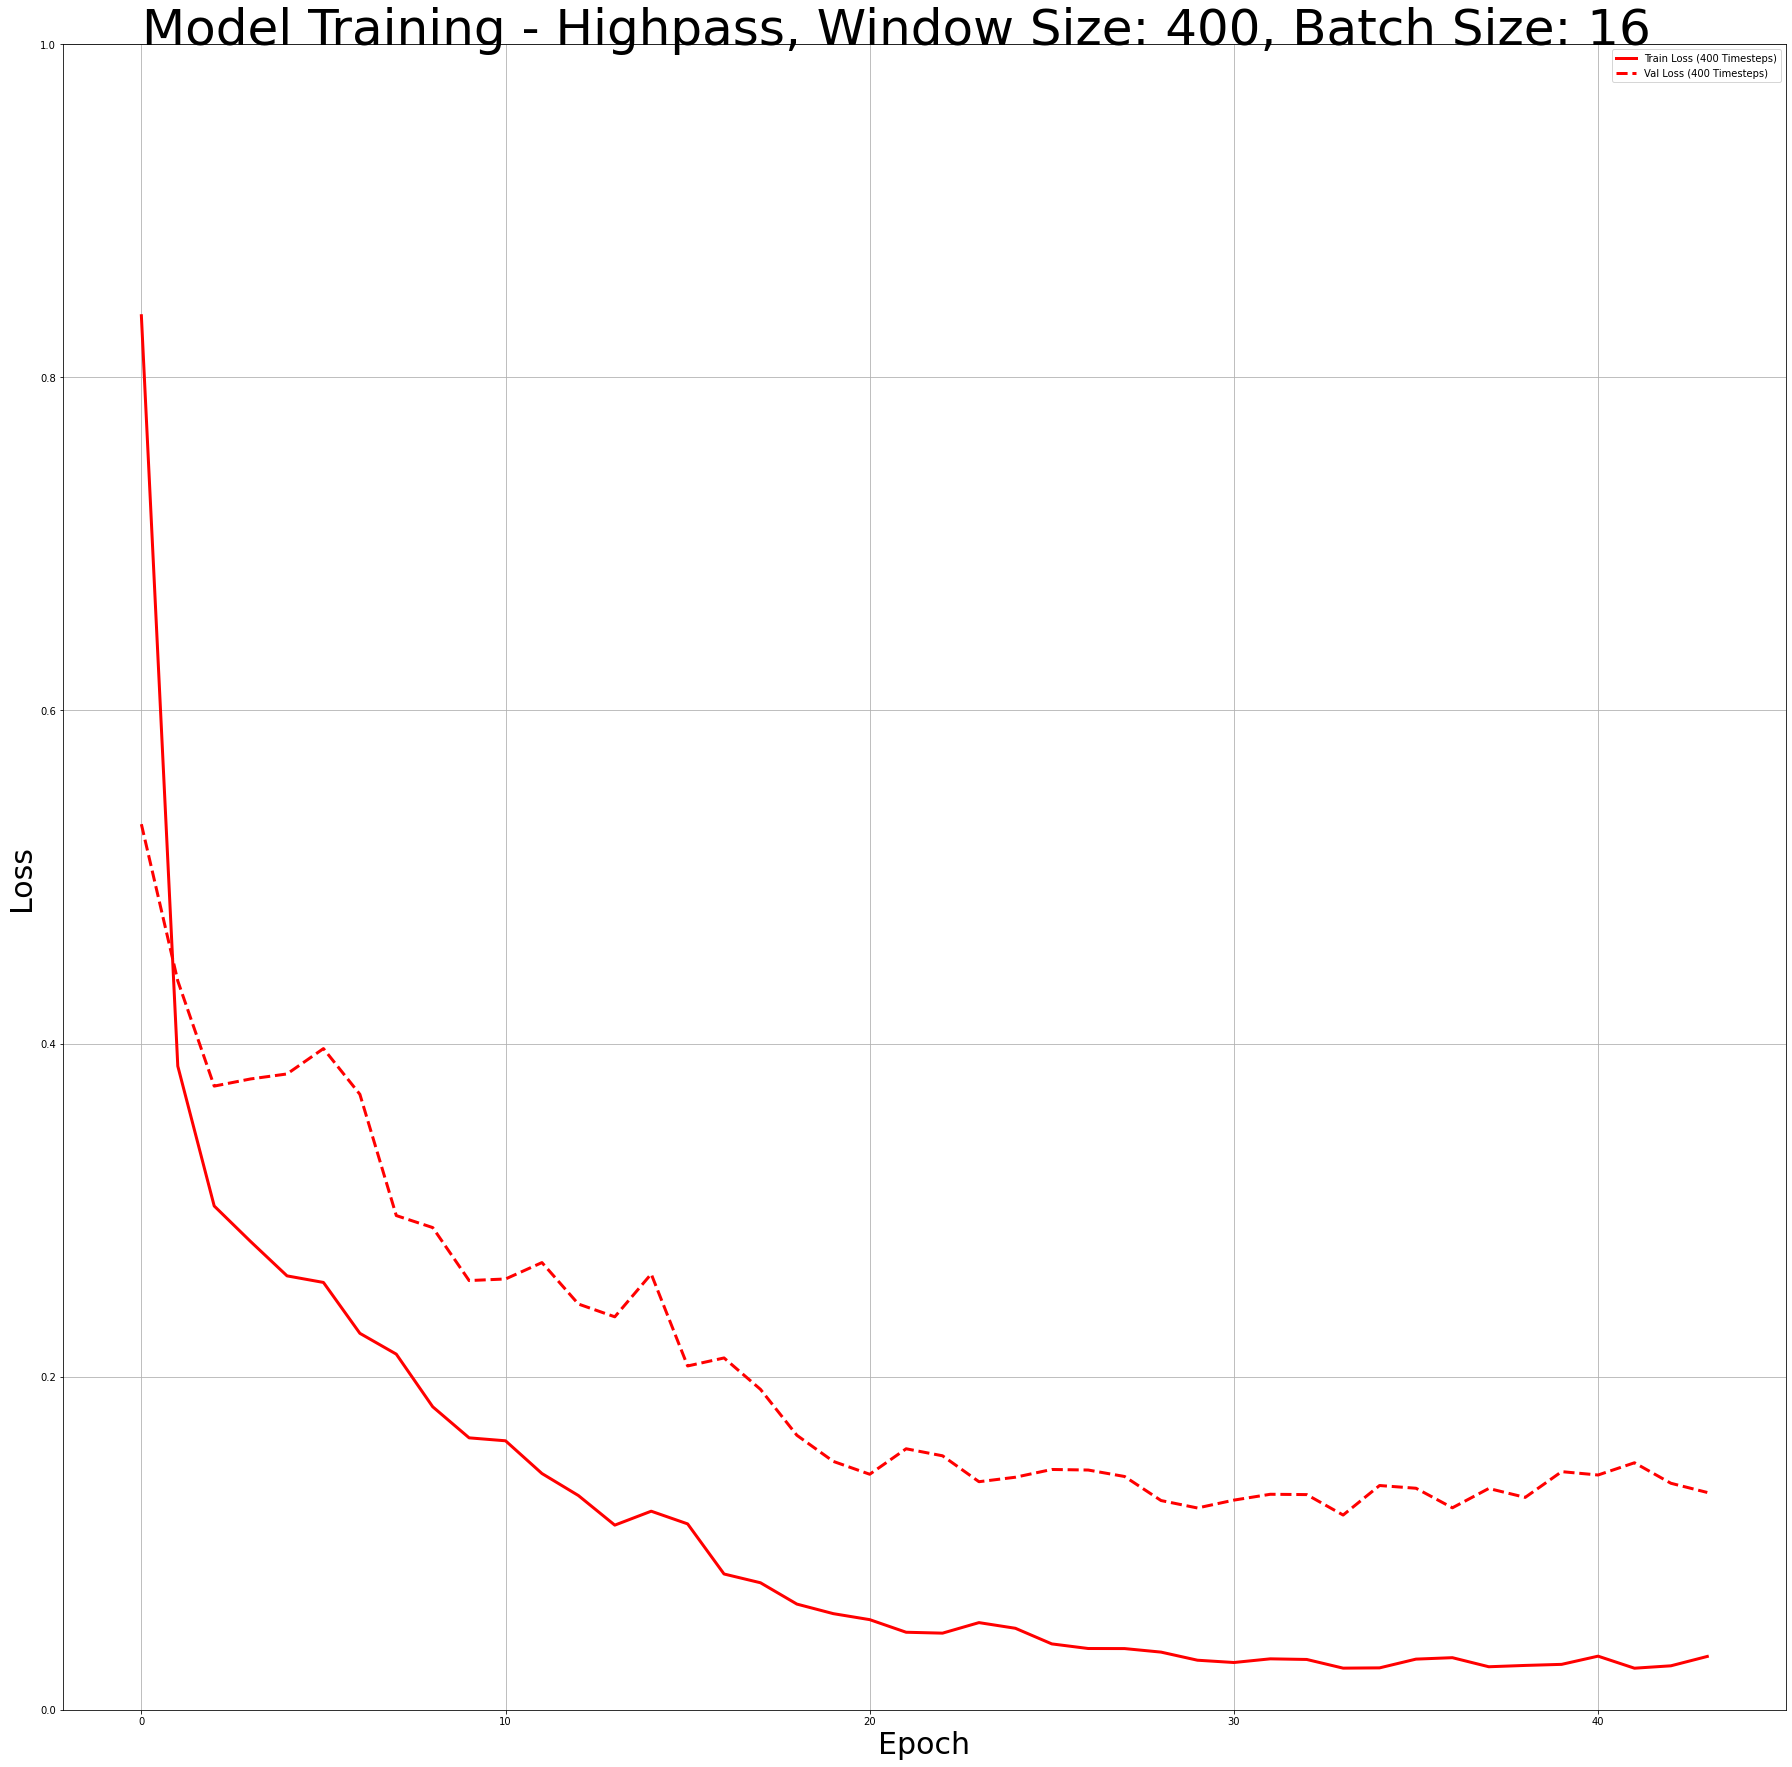

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,25))

ax.plot(history['lstm_'+str(ww)+'_'+filt].history['loss'], label='Train Loss ('+str(ww)+' Timesteps)',linewidth=3, c='red')
ax.plot(history['lstm_'+str(ww)+'_'+filt].history['val_loss'], label='Val Loss ('+str(ww)+' Timesteps)',linewidth=3, ls='--', c='red')

fig.patch.set_facecolor('white')
ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)
ax.set_ylim((0, 1))
ax.grid()
ax.legend()
fig.suptitle('Model Training - Highpass, Window Size: 400, Batch Size: 16', fontsize = 50)

plt.tight_layout()
plt.show()

In [33]:
units=32 #found in the layer compile and model creation e.g. .LSTM(units)
weights = lstm_model.layers[0].get_weights()[0]

input_gate = weights[:, :units]
forget_gate = weights[:, units: units * 2]
cell_state = weights[:, units * 2: units * 3]
output = weights[:, units * 3:]

print(weights.shape)
weights

(2308, 128)


array([[-0.00935066,  0.06776627, -0.01667996, ..., -0.02903929,
         0.02790994, -0.00793597],
       [ 0.05522342,  0.00177046,  0.00240722, ..., -0.02355771,
         0.07307922, -0.02864651],
       [-0.03125199,  0.05944411,  0.02325385, ..., -0.06843908,
         0.09303317, -0.01434634],
       ...,
       [-0.10336913, -0.02359112,  0.03889211, ..., -0.15633889,
        -0.0204784 ,  0.03187427],
       [-0.01060569,  0.01522983, -0.01356943, ...,  0.05682359,
        -0.06889068, -0.04549493],
       [-0.00202845,  0.03750679,  0.03599386, ...,  0.04270991,
        -0.010036  , -0.04245941]], dtype=float32)

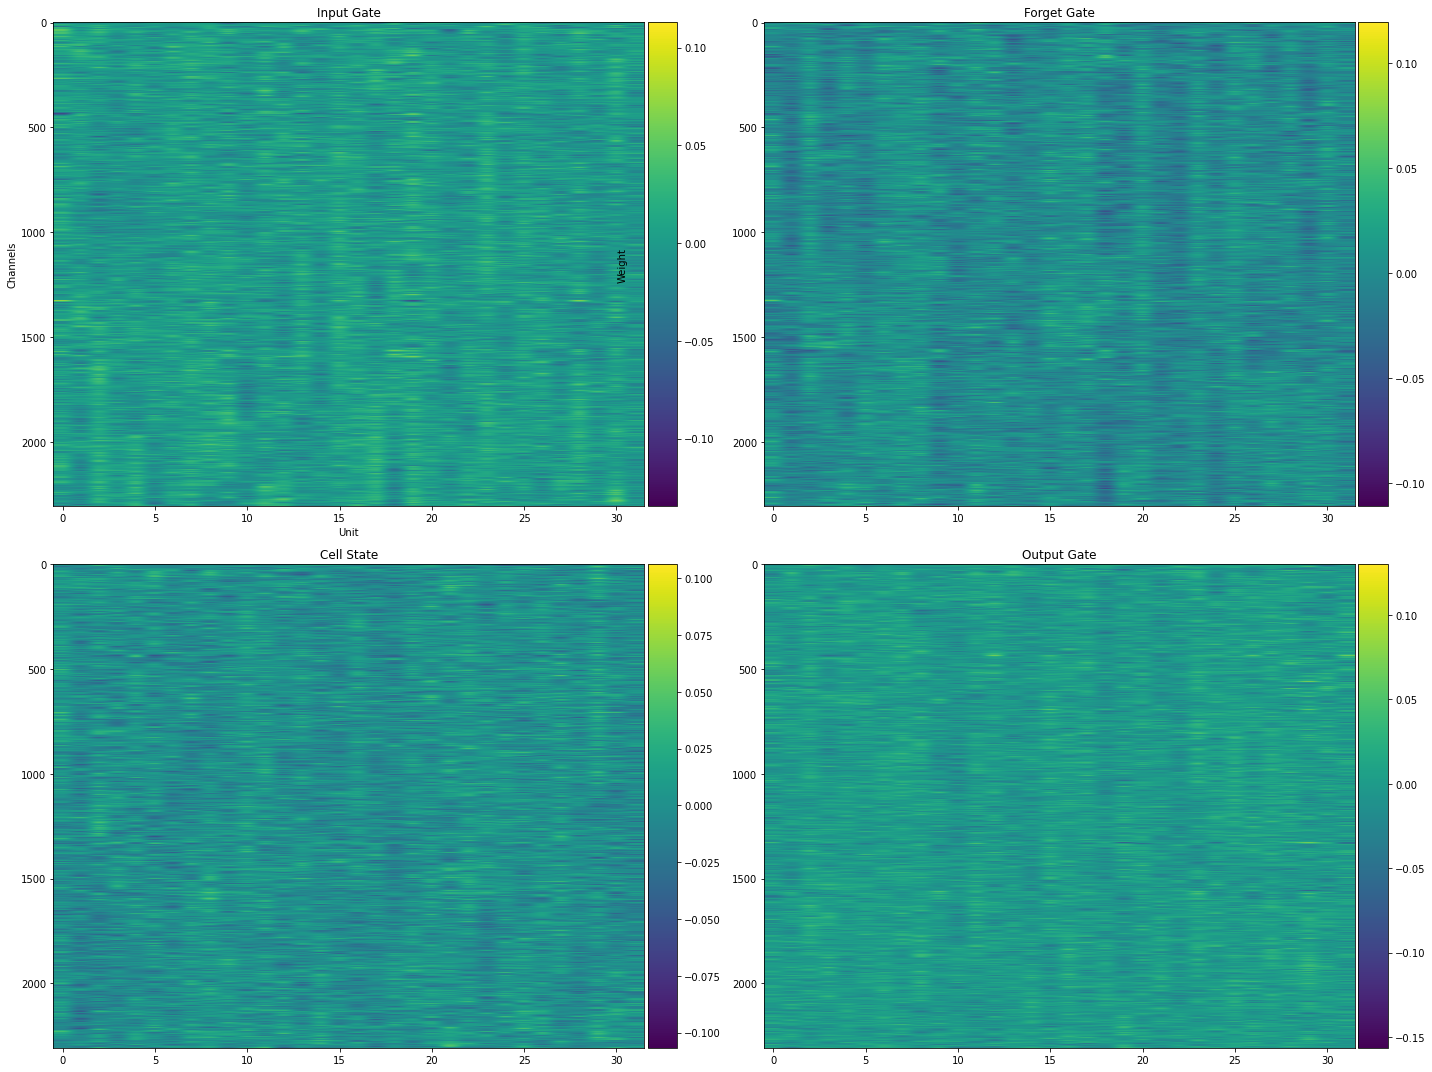

In [77]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(20,15))

ax0 = fig.add_subplot(221)
im0 = ax0.imshow(input_gate, aspect = 'auto')
ax0.set_ylabel('Channels')
ax0.set_xlabel('Unit')
ax0.set_title('Input Gate')

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
clb = fig.colorbar(im0, cax=cax, orientation='vertical', )
clb.ax.set_ylabel('Weight', labelpad=-97)

ax1 = fig.add_subplot(222)
im1 = ax1.imshow(forget_gate, aspect = 'auto')
ax1.set_title('Forget Gate')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(223)
im2 = ax2.imshow(cell_state, aspect = 'auto')
ax2.set_title('Cell State')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(224)
im3 = ax3.imshow(output, aspect = 'auto')
ax3.set_title('Output Gate')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')


# ax0.set_ylabel('Channels')
# ax0.set_xlabel('LSTM Unit')

# ax0.set_title('Input Weights')
# ax1.set_title('Forget Gate')
# ax2.set_title('Cell State')
# ax3.set_title('Output')
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

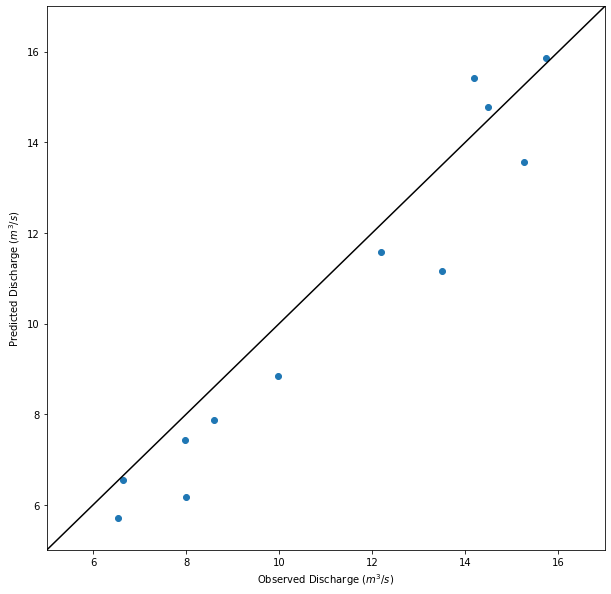

In [82]:
pred_on_test = lstm_model.predict(multi_step_window_shuffled.test)
pred_on_test = pred_on_test.squeeze()
pred_on_test = pred_on_test[:,-1]

predictions_test = (pred_on_test * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean

test_true_dis = []

for i in multi_step_window_shuffled.test.as_numpy_iterator():
    test_true_dis.append(i[1])
    
test_true_dis = (test_true_dis[0].squeeze() * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean

fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
plt.scatter(test_true_dis,predictions_test)
plt.plot([5,17],[5,17], color='black')
plt.ylim([5,17])
plt.xlim([5,17])
plt.ylabel('Predicted Discharge $(m^3/s)$')
plt.xlabel('Observed Discharge $(m^3/s)$')
plt.show()

In [79]:
window_no_shuf = d2d.WindowGenerator(df_all_chan,
                                                input_width=ww,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=input_columns,
                                                shuffle=True,
                                                batch_size=bs)
train_data = []
for i in window_no_shuf.train.as_numpy_iterator():
    train_data.append(i[0])

In [80]:
train_data = np.asarray(train_data)
train_data.shape

train_data = np.reshape(train_data, (train_data.shape[0]*train_data.shape[1], ww, train_data.shape[3]))

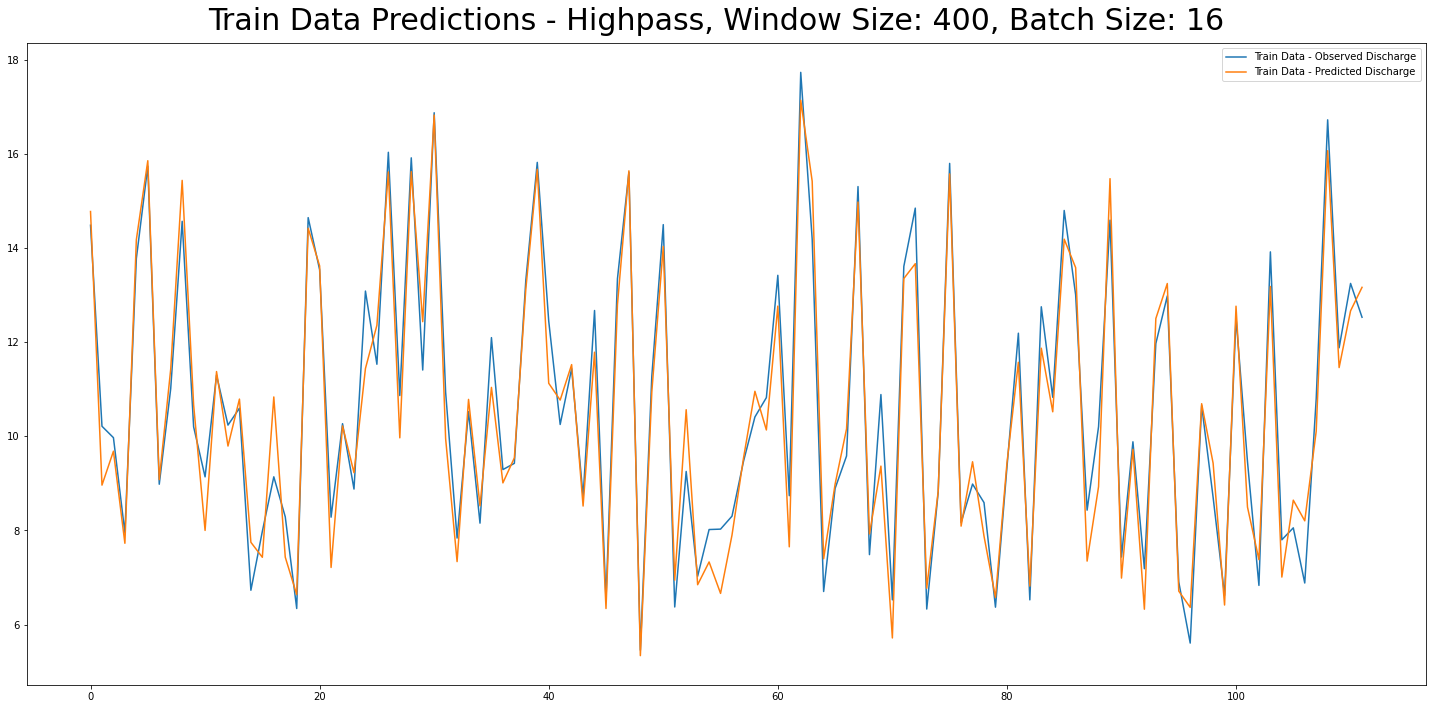

In [90]:
pred_on_train = lstm_model.predict(train_data)

train_dis = []
for i in window_no_shuf.train.as_numpy_iterator():
    train_dis.append(i[1])
train_dis = np.asarray(train_dis).squeeze().reshape(112,)

pred_on_train = pred_on_train.squeeze()
pred_on_train = pred_on_train[:,-1]

train_obs_dis = (train_dis *multi_step_window_shuffled.dis_std)+multi_step_window_shuffled.dis_mean
pred_train_data = (pred_on_train *multi_step_window_shuffled.dis_std)+multi_step_window_shuffled.dis_mean

fig = plt.figure(figsize=(20,10))
fig.patch.set_facecolor('white')
plt.plot(train_obs_dis, label = 'Train Data - Observed Discharge', )
plt.plot(pred_train_data, label = 'Train Data - Predicted Discharge')
fig.suptitle('Train Data Predictions - Highpass, Window Size: 400, Batch Size: 16', fontsize = 30)
plt.tight_layout()
plt.legend()
plt.show()